In [14]:
from deap import base, creator, tools, algorithms
import deap.benchmarks.tools as bt
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from numpy import pi
import operator
from matplotlib.ticker import MaxNLocator

creator.create("obj", base.Fitness, weights=(-1.0))
creator.create("Ind", list, fitness=creator.obj)

/Users/gwenchee/mambaforge3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'obj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/gwenchee/mambaforge3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Ind' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
checkpoint_file = "checkpoint.pkl"
with open(checkpoint_file, "rb") as cp_file:
    cp = pickle.load(cp_file)

In [16]:
cp["input_file"]

{'control_variables': {'radius_top': {'min': 0.05, 'max': 0.35},
  'radius_bot': {'min': 0.05, 'max': 0.35}},
 'evaluators': {'openmc_gc': {'order': 0,
   'input_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc.py'],
   'execute': [['aprun -n 2 -d 64 --env OMP_NUM_THREADS=64 openmc-0.12.2'],
    ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ../../../../../moltres/python/moltres_xs.py',
     'fhr_plank_gc.inp']],
   'inputs': ['radius_top', 'radius_bot'],
   'output_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc_output.py'],
   'outputs': ['keff2']},
  'moltres': {'order': 1,
   'input_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'automate_mesh.py'],
   'execute': [['bash', 'mesh_generate.sh'],
    ['aprun -n 64 -N 64 -d 1 -j 1 moltres-opt -i ', 'fhr_plank_moltres.i']],
   'inputs': ['radius_top', 'radius_bot'],
   'output_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_pla

In [17]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

In [18]:
def plot_1_obj(logbook, index, obj_name, short_name, save_fig, save_fig_title):
    gen = np.array(logbook.select("gen")) + 1
    obj_avg = get_ind_list(logbook.chapters["oup"].select("avg"), index)
    obj_std = get_ind_list(logbook.chapters["oup"].select("std"), index)
    obj_min = get_ind_list(logbook.chapters["oup"].select("min"), index)
    obj_max = get_ind_list(logbook.chapters["oup"].select("max"), index)
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(15,7))
    ax.errorbar(gen, obj_avg, yerr=obj_std, label="Ave "+ short_name, capsize=5)
    ax.plot(gen, obj_min, "*-", label="Min "+ short_name)
    ax.plot(gen, obj_max, "*-", label="Max "+ short_name)
    ax.set_xlabel("Generation [#]", fontsize=20)
    ax.set_ylabel(obj_name + " ("+short_name+") [K]", fontsize=18)
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(obj_name + " Evolution", fontsize=24)
    if save_fig:
        plt.savefig(save_fig_title,bbox_inches='tight', dpi=300)

In [19]:
logbook = cp["logbook"]

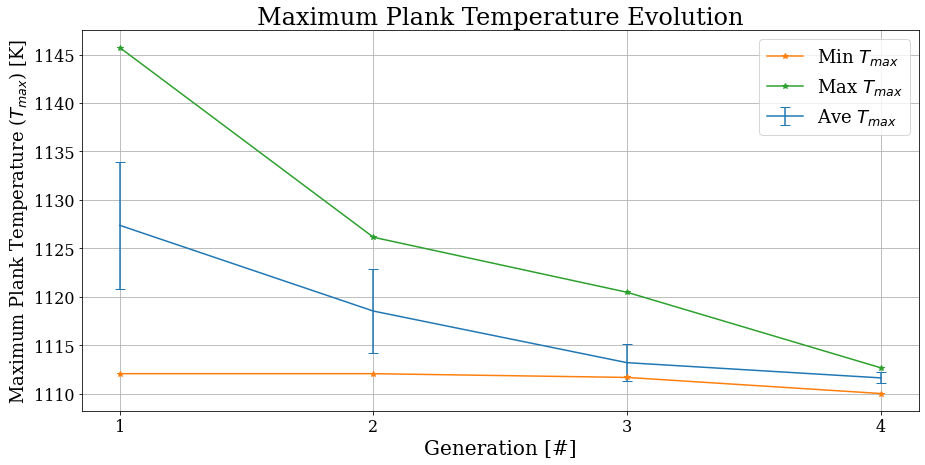

In [20]:
plot_1_obj(logbook, 0, "Maximum Plank Temperature", "$T_{max}$", True, "slab-obj-1-temp-evol-coolant.png")

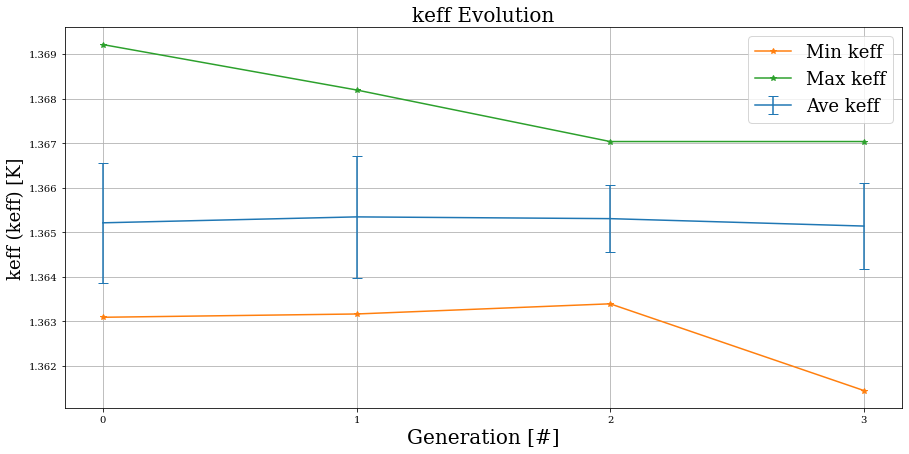

In [8]:
plot_1_obj(logbook, 1, "keff", "keff", False, "")

In [22]:
def plot_1_ind(logbook, index, obj_name, short_name, save_fig, save_fig_title):
    gen = logbook.select("gen")
    obj_avg = get_ind_list(logbook.chapters["ind"].select("avg"), index)
    obj_std = get_ind_list(logbook.chapters["ind"].select("std"), index)
    obj_min = get_ind_list(logbook.chapters["ind"].select("min"), index)
    obj_max = get_ind_list(logbook.chapters["ind"].select("max"), index)
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(15,7))
    ax.errorbar(gen, obj_avg, yerr=obj_std, label="Ave "+ short_name, capsize=5)
    ax.plot(gen, obj_min, "*-", label="Min "+ short_name)
    ax.plot(gen, obj_max, "*-", label="Max "+ short_name)
    ax.set_xlabel("Generation", fontsize=20)
    ax.set_ylabel(obj_name, fontsize=20)
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
    ax.set_title(obj_name + " Evolution", fontsize=20)
    if save_fig:
        plt.savefig(save_fig_title,bbox_inches='tight')

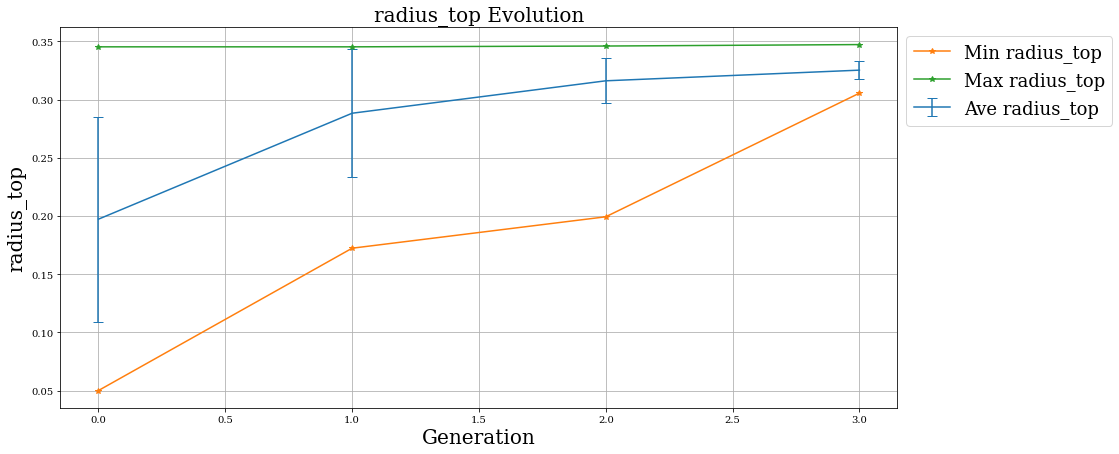

In [23]:
plot_1_ind(logbook, 0, "radius_top", "radius_top", False, "")

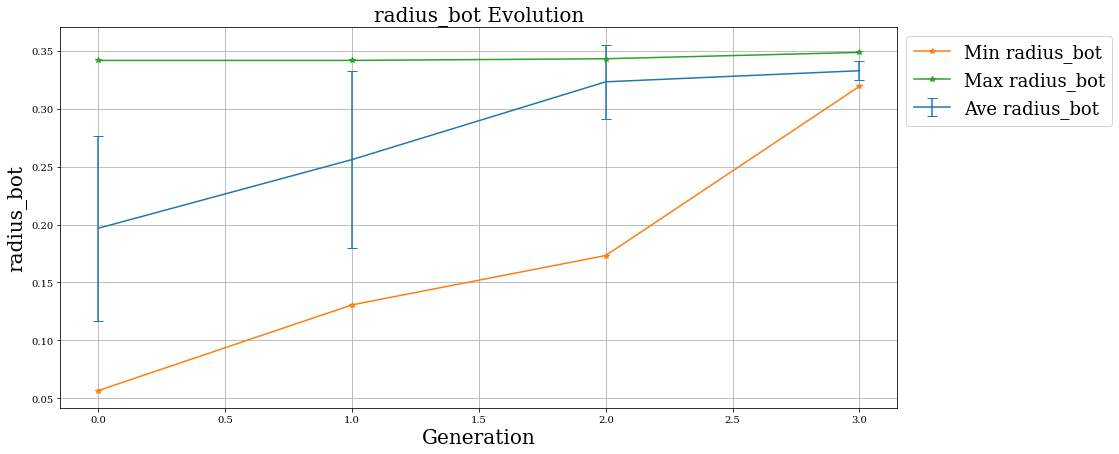

In [24]:
plot_1_ind(logbook, 1, "radius_bot", "radius_bot", False, "")

In [25]:
results = cp["all"]
oup_results = results["outputs"]
for i, pop in enumerate(results["populations"]):
    obj_0 = np.array([item[0] for item in oup_results[i]])
    sorted_index_0 = np.argsort(obj_0)
    for j, ind in enumerate(pop):
        if i == 3:
            if j in sorted_index_0[0:5]:
                print(oup_results[i][j][0], ind)

1110.406251464 [0.33748489355456535, 0.3444133288368236]
1110.406251464 [0.33748489355456535, 0.3444133288368236]
1110.406251464 [0.33748489355456535, 0.3444133288368236]
1110.0268064017 [0.3471952090737323, 0.3401400237421686]
1110.0268064017 [0.3471952090737323, 0.3401400237421686]


0.33748489355456535 0.3444133288368236
0.33748489355456535 0.3444133288368236
0.33748489355456535 0.3444133288368236
0.3471952090737323 0.3401400237421686
0.3471952090737323 0.3401400237421686


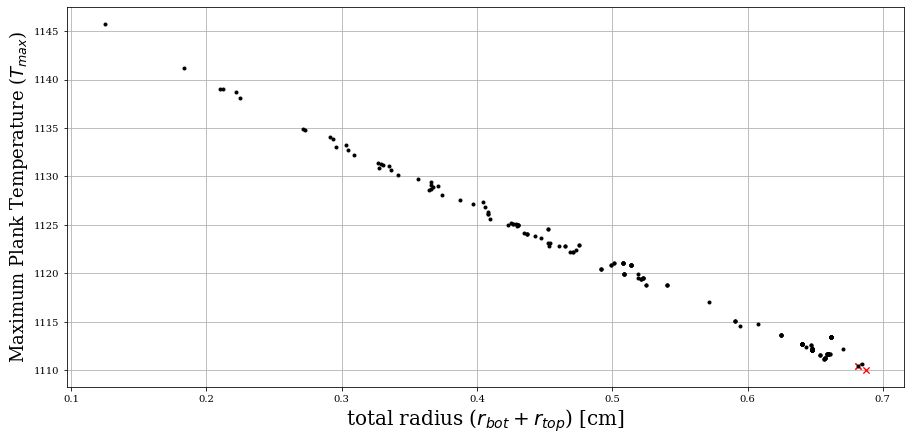

In [26]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
radius_top = []      
radius_bot = []
ppf = []
for j, pop in enumerate(results["populations"]):
    oups = results["outputs"][j]
    obj_0 = np.array([item[0] for item in oups])
    sorted_index_0 = np.argsort(obj_0)
    for i, ind in enumerate(pop):
        oup = oups[i]
        if j == 3:
            if i in sorted_index_0[:5]:
                print(ind[0], ind[1])
                ax.plot(ind[0]+ind[1], oup[0], 'rx')
            else:
                ax.plot(ind[0]+ind[1], oup[0], 'k.')
        else:
            ax.plot(ind[0]+ind[1], oup[0], 'k.')
ax.set_xlabel("total radius ($r_{bot} + r_{top}$) [cm]", fontsize=20)
ax.set_ylabel("Maximum Plank Temperature ($T_{max}$)", fontsize=18)
ax.grid()
#ax.set_ylim(1110, 1125)

3 31 [0.33748489355456535, 0.3444133288368236]


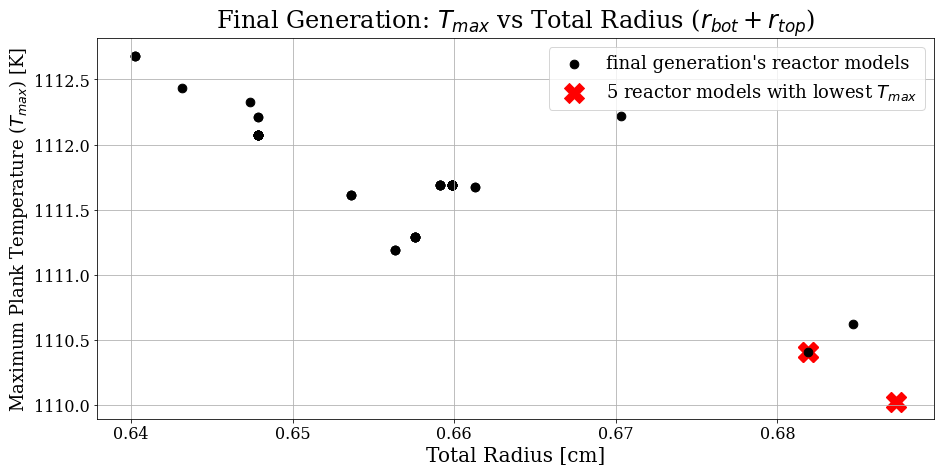

In [28]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            print(ind.gen, ind.num, ind)
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red", 
                       label="5 reactor models with lowest $T_{max}$")
            count += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("Total Radius [cm]", fontsize=20)
ax.set_ylabel("Maximum Plank Temperature ($T_{max}$) [K]", fontsize=18)
ax.set_title("Final Generation: $T_{max}$ vs Total Radius ($r_{bot} + r_{top}$)", fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
ax.grid()
plt.savefig("slab-obj-1-temp-final-coolant.png",bbox_inches='tight', dpi=300)
#ax.set_ylim(1.08, 1.10)

3 31 [0.33748489355456535, 0.3444133288368236]


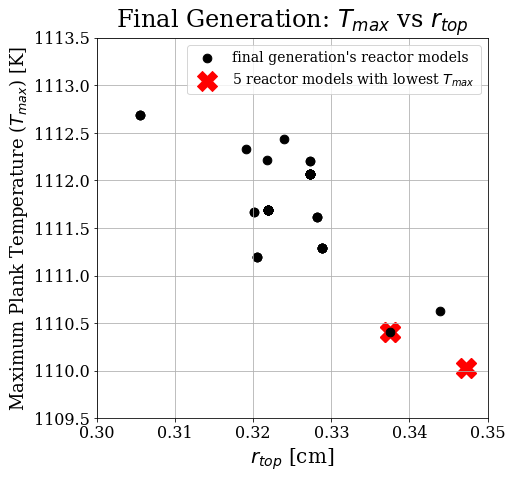

In [40]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            print(ind.gen, ind.num, ind)
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red", 
                       label="5 reactor models with lowest $T_{max}$")
            count += 1
        else:
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0:
            ax.scatter(ind[0], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim([0.30, 0.35])
ax.set_ylim([1109.5, 1113.5])
ax.set_xlabel("$r_{top}$ [cm]", fontsize=20)
ax.set_ylabel("Maximum Plank Temperature ($T_{max}$) [K]", fontsize=18)
ax.set_title("Final Generation: $T_{max}$ vs $r_{top}$", fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
ax.grid()
plt.savefig("slab-obj-1-temp-final-coolant-rtop.png",bbox_inches='tight', dpi=300)
#ax.set_ylim(1.08, 1.10)

3 31 [0.33748489355456535, 0.3444133288368236]


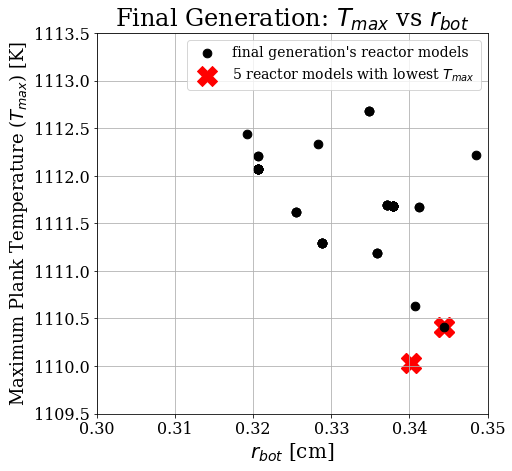

In [41]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            print(ind.gen, ind.num, ind)
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red", 
                       label="5 reactor models with lowest $T_{max}$")
            count += 1
        else:
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0:
            ax.scatter(ind[1], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[1], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim([0.30, 0.35])
ax.set_ylim([1109.5, 1113.5])
ax.set_xlabel("$r_{bot}$ [cm]", fontsize=20)
ax.set_ylabel("Maximum Plank Temperature ($T_{max}$) [K]", fontsize=18)
ax.set_title("Final Generation: $T_{max}$ vs $r_{bot}$", fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
ax.grid()
plt.savefig("slab-obj-1-temp-final-coolant-rbot.png",bbox_inches='tight', dpi=300)
#ax.set_ylim(1.08, 1.10)